### Python Assignment: k-Means Clustering

In this assignment, we will use k-Means to assign universities to different clusters based on a group of 16 measurements. 
It is very important to note that although we actually have the labels for this data set, we will NOT use them for the KMeans clustering algorithm, since it is an unsupervised learning algorithm.



##### The Data

We will use a data frame with 777 observations on the following 18 variables.

Private:  A factor with levels No and Yes indicating private or public university

Apps:  Number of applications received

Accept:  Number of applications accepted

Enroll:  Number of new students enrolled

Top10perc: Pct. new students from top 10% of H.S. class

Top25perc: Pct. new students from top 25% of H.S. class

FUndergrad: Number of fulltime undergraduates

PUndergrad: Number of parttime undergraduates

Outstate: Out-of-state tuition

RoomBoard: Room and board costs

Books: Estimated book costs

Personal: Estimated personal spending

PhD: Pct. of faculty with Ph.D.’s

Terminal: Pct. of faculty with terminal degree

SFRatio: Student/faculty ratio

perc_alumni: Pct. alumni who donate

Expend: Instructional expenditure per student

GradRate: Graduation rate

### Step 1: Import the libraries you usually use for data analysis.
For this assignment, you will need: numpy, pandas, seaborn, matplotlib.pyplot and scikit

Don't forget to set %matplotlib inline

In [158]:
#Your importing codes here
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
%matplotlib inline



### Step 2: Get the data
Read in the College_Data file using read_excel. Figure out how to set the first column as the index.


In [159]:
# Your code here ,saved the datafile college_data.xlsx to my local computer
df = pd.read_excel (r'C:\Python\KMeans\College_Data.xlsx')


In [161]:
# Check the head of the data. check info. about the data
df.head(5)



,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percAlumni,Expend,GradRate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [166]:
#check info. about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  RoomBoard    777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  SFRatio      777 non-null    float64
 16  percAlumni   777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  GradRate     777 non-null    int64  
dtypes: float

In [169]:
#check info. about the data
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percAlumni,Expend,GradRate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Step 3: Visualize the data

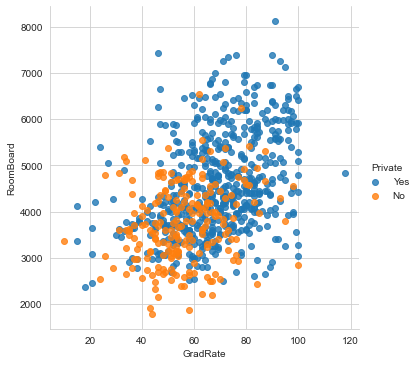

In [170]:
# Create a scatterplot of GradRate versus RoomBoard where the points are colored by the "Private" column
import seaborn as sns

# For a scatter plot, use the sns.lmplot method. do the shift-tab trick to understand its parameters.
sns.set_style('whitegrid')
sns.lmplot(x ='GradRate', y ='RoomBoard',
          fit_reg = False, hue = 'Private',
          data = df)
# sns.set_style('whitegrid') might make the background nicer to look at


##### Now that you know the basics of scatter plot in Python, make another scatter plot with two attributes as x and y, 
##### and A THIRD, categorical attribute as the color. Briefly analyze what you found


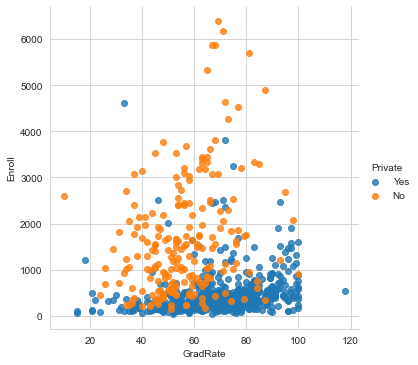

In [171]:
# Now that you know the basics of scatter plot in Python, make another scatter plot with two attributes as x and y, 
# and A THIRD, categorical attribute as the color. Briefly analyze what you found
sns.set_style('whitegrid')
sns.lmplot(x ='GradRate', y ='Enroll',
          fit_reg = False, hue = 'Private',
          data = df)

#### The highest percentage of people who finished college are from private universities from a range of  80-100 %.The cluster consists of private college students.

C:\Users\jvicm\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


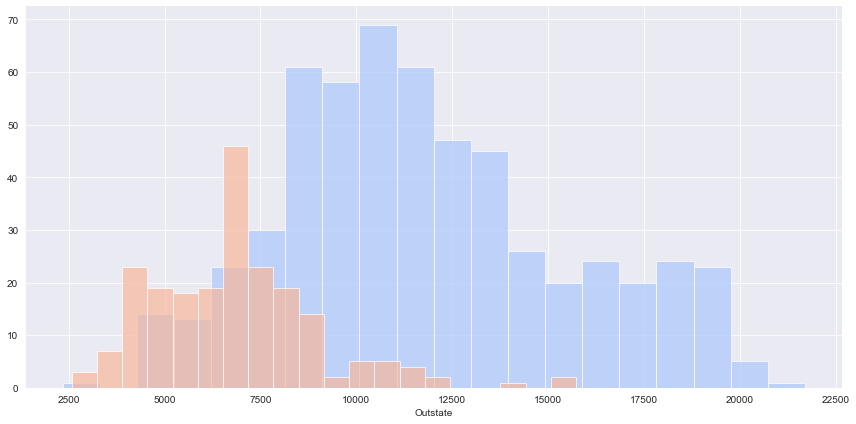

In [172]:
# Next, create a stacked histogram showing Out of State Tuition based on the Private column. 
# Try doing this using sns.FacetGrid. Here is how you do it:

sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

C:\Users\jvicm\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


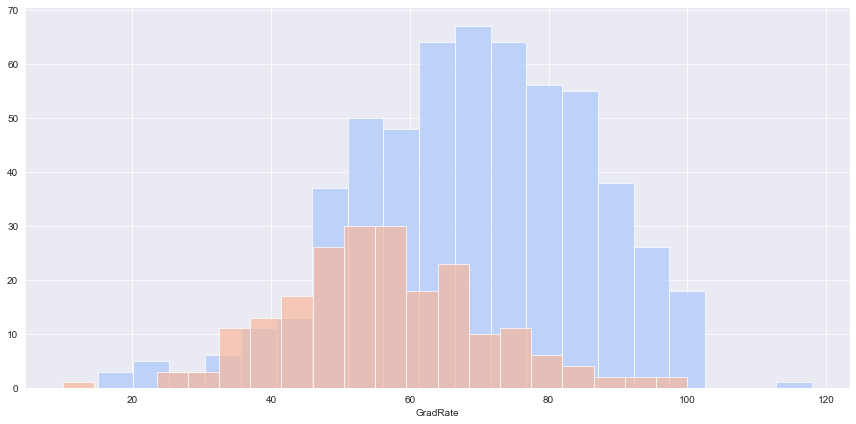

In [196]:
# Try create a different histogram. This time, analyze the distribution of gradRate based on the Private column -
# Don't just copy and paste the code. Think about the parameters -- they might not all make sense now that what you 
# are measuring is different
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue='Private',palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'GradRate',bins=20,alpha=0.7)




In [174]:
# you might have noticed that one school has a grad Rate higher than 100%! Write some code to find which school that is
df[df['GradRate'] > 100]


,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percAlumni,Expend,GradRate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [178]:
# Let's do some data cleansing -- either drop that school or set its grad Rate to 100. The choice is yours, but you need to
# do it in Python below:
update_df = df.drop(95,axis= 0)

In [179]:
update_df.shape

(776, 19)

### Step 3: Run k-Means
Time to run the code!

In [146]:
# Create an instance of a K Means model with 2 clusters. name it kmeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans




In [180]:
# model with 2 clusters
KMC = KMeans(n_clusters = 2)

In [181]:
df = pd.read_excel (r'C:\Python\KMeans\College_Data.xlsx', index_col=0)
KMC.fit(df.drop('Private', axis = 1))

KMeans(n_clusters=2)

In [182]:
# What are the cluster center vectors?
KMC.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

### Step 4: Evaluation
There is no perfect way to evaluate clustering, since it is unsupervised. However, in this case, we do have the labels (private school or not), so we take advantage of this to evaluate our results. Just remember that you rarely have this luxury in the real world.

In [183]:
# Create an attribute "cluster", it is 1 when kmeans result is consistent with the original label, and 0 otherwise
# I have written the code for you:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

df['Cluster'] = df['Private'].apply(converter)



In [195]:
# Take a look at the data set and see how our kmeans works overall -- to actually get a quantitative analysis of 
# its performance, you can run the following code. But don't worry about its meanings yet. We will have a much more
# in-depth look at the confusian matrix later, when we evaluate a classification algorithm
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df['Cluster'], KMC.labels_))
print(classification_report(df['Cluster'], KMC.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

